# **Análisis de canciones: Predicción del género musical**

# Proyecto de Machine Learning

## PARTE V: Modelo NO Supervisado

### by Marta Buesa

#### Febrero 2022 


![MartaBuesaProyectoML](portada_ML.png)

# 1. Importo librerias

In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

# 2. Importo datasets


### Train estandarizado

In [108]:
train_total_scal = pd.read_csv('csvs/train_total_scaled.csv')
train_total_scal.drop(columns=['Unnamed: 0'], inplace=True)
train_total_scal.head(10)

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,speechiness,...,key_FA#,key_LA,key_LA#,key_MI,key_RE,key_RE#,key_SI,key_SOL,key_SOL#,music_genre
0,-1.181905,-0.460124,-0.443239,1.288685,0.659647,0.525620,2.361115,0.109311,1.342698,-0.541965,...,-0.258507,-0.326158,-0.267805,-0.283509,-0.341944,-0.179589,-0.287891,-0.360134,-0.266344,2
1,-1.504704,1.925870,-1.789203,2.919348,-1.853332,1.271448,-0.442565,-2.003693,-0.744769,-0.580440,...,-0.258507,-0.326158,-0.267805,-0.283509,-0.341944,5.568271,-0.287891,-0.360134,-0.266344,3
2,0.173848,0.068791,1.341994,-0.227422,-0.242448,-0.810123,0.279567,-0.386161,-0.744769,-0.566629,...,-0.258507,-0.326158,-0.267805,-0.283509,-0.341944,-0.179589,-0.287891,2.776744,-0.266344,2
3,-0.342630,-0.801568,0.074873,-0.238809,0.534566,0.525620,0.006656,0.497551,1.342698,-0.555777,...,-0.258507,-0.326158,-0.267805,-0.283509,-0.341944,-0.179589,-0.287891,2.776744,-0.266344,4
4,0.884005,-0.894991,-0.747348,0.325328,1.152388,1.249039,0.167285,0.919065,-0.744769,-0.459096,...,-0.258507,3.066002,-0.267805,-0.283509,-0.341944,-0.179589,-0.287891,-0.360134,-0.266344,0
5,-0.988226,-0.891543,-0.843086,-0.165311,1.463193,0.205367,1.096209,1.101408,1.342698,0.466274,...,-0.258507,-0.326158,-0.267805,-0.283509,-0.341944,-0.179589,3.473537,-0.360134,-0.266344,2
6,-0.923667,-0.882845,0.362087,0.148177,0.011503,-1.093161,-0.402865,0.192329,-0.744769,-0.615956,...,-0.258507,-0.326158,-0.267805,-0.283509,-0.341944,-0.179589,-0.287891,-0.360134,-0.266344,5
7,-1.052786,-0.889192,-0.443239,-0.436192,1.341903,0.525620,1.176593,0.819246,-0.744769,-0.422594,...,-0.258507,-0.326158,-0.267805,-0.283509,-0.341944,-0.179589,-0.287891,-0.360134,-0.266344,1
8,0.819445,-0.608220,2.034687,-0.048008,-0.462287,0.525620,-1.027677,-0.021805,1.342698,-0.112822,...,-0.258507,-0.326158,-0.267805,-0.283509,-0.341944,-0.179589,-0.287891,-0.360134,-0.266344,0
9,0.496646,-0.892982,-0.353132,-0.099726,1.341903,-1.664443,0.202728,0.771642,1.342698,-0.485733,...,-0.258507,-0.326158,-0.267805,-0.283509,-0.341944,-0.179589,-0.287891,2.776744,-0.266344,0


In [109]:
print(train_total_scal.shape)

(39719, 24)


In [110]:
columnas = train_total_scal.columns.to_list()
len(columnas)

24

### Test estandarizado

In [111]:
test_total_scal = pd.read_csv('csvs/test_total_scaled.csv')
test_total_scal.drop(columns=['Unnamed: 0'], inplace=True)
test_total_scal.head(10)

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,speechiness,...,key_FA#,key_LA,key_LA#,key_MI,key_RE,key_RE#,key_SI,key_SOL,key_SOL#,music_genre
0,1.013124,1.793641,-0.409449,-0.238809,-1.769945,-0.679633,2.289930,-0.353053,1.342698,-0.496585,...,-0.258507,-0.326158,-0.267805,-0.283509,2.924454,-0.179589,-0.287891,-0.360134,-0.266344,7
1,-0.729988,-0.845351,-0.431976,-0.976358,1.141017,0.066285,-0.415983,0.543672,1.342698,-0.196678,...,-0.258507,-0.326158,-0.267805,-0.283509,-0.341944,-0.179589,-0.287891,-0.360134,-0.266344,2
2,-0.536309,0.979700,-0.921929,0.920189,-0.841318,1.266274,-0.469621,-0.632580,1.342698,-0.501517,...,-0.258507,-0.326158,-0.267805,3.527221,-0.341944,-0.179589,-0.287891,-0.360134,-0.266344,7
3,1.206803,1.555630,-0.234868,-0.511385,-0.223497,0.527979,0.422459,-0.279753,-1.202430,-0.631740,...,-0.258507,-0.326158,-0.267805,-0.283509,-0.341944,-0.179589,-0.287891,-0.360134,-0.266344,9
4,1.787840,-0.602344,0.874567,-1.304742,0.056987,-1.562876,0.312506,0.578098,1.342698,1.442945,...,-0.258507,-0.326158,-0.267805,-0.283509,-0.341944,-0.179589,3.473537,-0.360134,-0.266344,6
5,0.948564,-0.366095,0.198769,-0.225329,-0.663173,-1.461280,-0.338927,0.379448,1.342698,-0.392012,...,-0.258507,-0.326158,-0.267805,-0.283509,-0.341944,-0.179589,-0.287891,-0.360134,-0.266344,8
6,-0.536309,0.427278,-0.634715,1.720431,0.913598,0.197503,-1.033607,0.397073,1.342698,-0.076320,...,-0.258507,-0.326158,-0.267805,-0.283509,-0.341944,-0.179589,-0.287891,-0.360134,-0.266344,7
7,-0.729988,-0.822431,1.319468,0.765024,0.314728,-0.298540,0.503579,0.621584,1.342698,-0.156230,...,-0.258507,-0.326158,-0.267805,3.527221,-0.341944,-0.179589,-0.287891,-0.360134,-0.266344,5
8,-0.278070,-0.822725,-0.133498,-0.250655,-0.015029,-0.663017,1.840748,0.461478,-1.202430,-0.649498,...,-0.258507,-0.326158,-0.267805,-0.283509,-0.341944,-0.179589,-0.287891,2.776744,-0.266344,4
9,0.625766,-0.339649,-0.268658,0.794670,-0.223497,-0.998110,1.148707,0.364130,-1.202430,-0.586359,...,-0.258507,-0.326158,-0.267805,-0.283509,-0.341944,-0.179589,-0.287891,2.776744,-0.266344,9


In [112]:
print(test_total_scal.shape)

(9943, 24)


### Generos_musicales 

* 'Alternative': 0
* 'Anime': 1 
* 'Blues': 2 
* 'Classical': 3
* 'Country': 4
* 'Electronic': 5 
* 'Hip-Hop': 6
* 'Jazz': 7
* 'Rap': 8
* 'Rock': 9

# Modelo Machine Learning: NO SUPERVISADO MEDIANTE CLUSTERING

# K-MEANS

### Importo librerias necesarias

In [113]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

### Evaluo cuantos clusters son óptimos
##### Aquí quiero ver si mediante modelo NO supervisado crea grupos fieles a sus generos musicales o hace mezclas y así definir nuevos géneros musicales como agrupaciones más optimas.

Voy a evaluar distintos K: desde 3 hasta 10

In [114]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(train_total_scal) for k in range(3,11)]

### Aplico **Inercia**: metrica que mide cuanto de cerca están de su centroide

In [115]:
inertias = [model.inertia_ for model in kmeans_per_k]

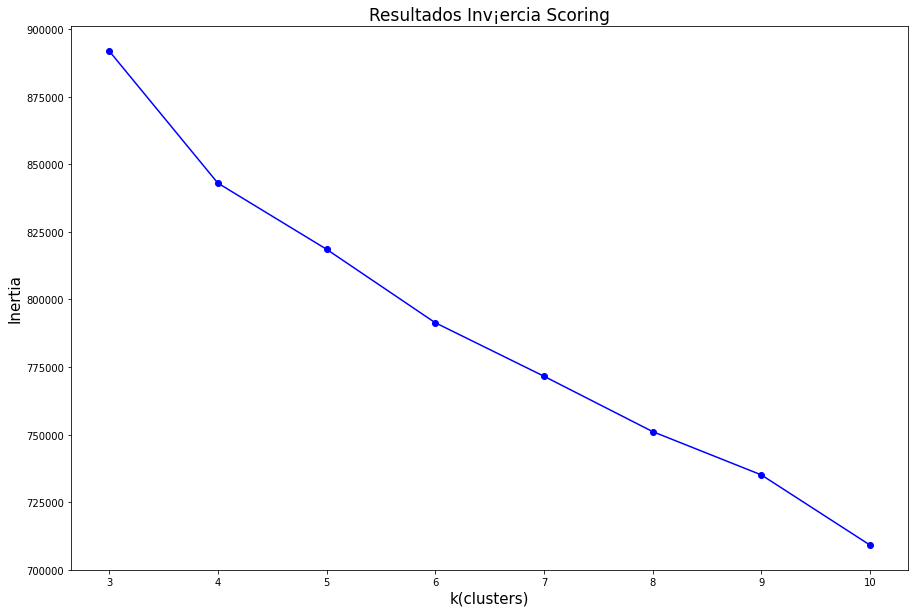

In [116]:
plt.figure(figsize=(15, 10))
plt.plot(range(3,11), inertias, 'bo-')
plt.xlabel('k(clusters)', fontsize=15)
plt.ylabel('Inertia', fontsize=15)
plt.title('Resultados Inv¡ercia Scoring', fontsize=17)
plt.show();

### Aplico **Silhouette_score**: metrica que me medira lo cerca que están de su centroide y lejos de los otros centroides

In [117]:
silhouette_scores = [silhouette_score(train_total_scal, model.labels_) for model in kmeans_per_k]

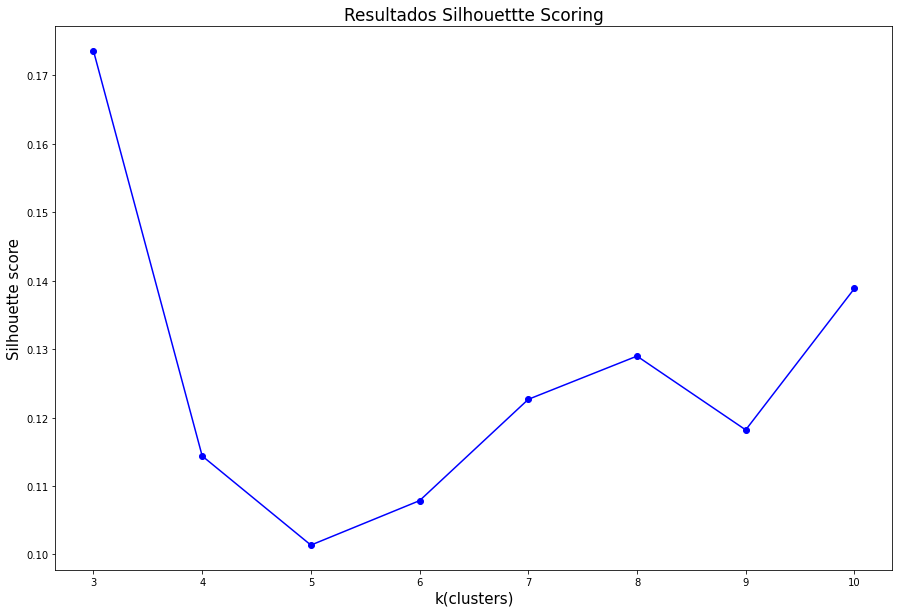

In [118]:
plt.figure(figsize=(15, 10))
plt.plot(range(3, 11), silhouette_scores, "bo-")
plt.xlabel("k(clusters)", fontsize=15)
plt.ylabel("Silhouette score", fontsize=15)
plt.title('Resultados Silhouettte Scoring', fontsize=17)
plt.show()

### El k más óptimo es el que se situa en el codo, es decir k=5

In [119]:
# Entreno el modelo
kmeans = KMeans(n_clusters=5).fit(train_total_scal)

### Gráfico pie: cuanto representa cada uno de los clusters

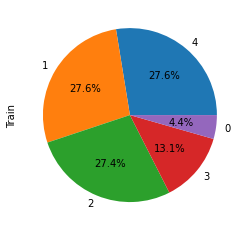

In [120]:
distrib = pd.DataFrame({'Train': kmeans.labels_})
distrib['Train'].value_counts().plot.pie(autopct='%.1f%%');

In [121]:
centroids = kmeans.cluster_centers_
print(centroids)

[[ 3.84390280e-01 -1.20443306e-01  4.10461660e-01 -2.60697736e-03
   6.81257748e-02  3.12785233e-02 -1.14140741e-02  1.72010660e-01
   4.89919894e-01  2.69245161e-01 -4.88318697e-02  1.25227997e-01
  -3.49610582e-01 -3.07488475e-01 -2.58507315e-01 -3.26157677e-01
   3.73405816e+00 -2.83509335e-01 -3.41944214e-01 -1.79588964e-01
  -2.87890974e-01 -3.60134033e-01 -2.66344490e-01  6.46534091e+00]
 [-4.22375791e-01 -3.52356464e-01 -2.06782419e-01  1.03524709e-02
   4.47751315e-01 -2.68028791e-01  1.19867490e-01  3.85924521e-01
  -3.03849990e-02 -1.91633787e-01  1.70502081e-01  2.22194744e-01
  -6.69156973e-02 -1.80015854e-03 -2.88720542e-03  3.89038779e-02
  -6.45312581e-02  1.61654707e-03  3.76335366e-02 -1.83800319e-02
   2.37859251e-02  3.16174944e-02 -1.80240743e-02  1.01324685e+00]
 [ 2.14927111e-01 -3.82471009e-01  4.62717041e-01 -9.60418864e-02
   3.20219866e-01 -4.35326909e-02  5.59475415e-02  3.63394817e-01
  -6.20769725e-02  2.62186157e-01  1.10426874e-01  6.19327194e-02
   1.290

In [122]:
centroides = pd.DataFrame(centroids, columns=columnas)
centroides

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,speechiness,...,key_FA#,key_LA,key_LA#,key_MI,key_RE,key_RE#,key_SI,key_SOL,key_SOL#,music_genre
0,0.384390,-0.120443,0.410462,-0.002607,0.068126,0.031279,-0.011414,0.172011,0.489920,0.269245,...,-0.258507,-0.326158,3.734058,-0.283509,-0.341944,-0.179589,-0.287891,-0.360134,-0.266344,6.465341
1,-0.422376,-0.352356,-0.206782,0.010352,0.447751,-0.268029,0.119867,0.385925,-0.030385,-0.191634,...,-0.002887,0.038904,-0.064531,0.001617,0.037634,-0.018380,0.023786,0.031617,-0.018024,1.013247
2,0.214927,-0.382471,0.462717,-0.096042,0.320220,-0.043533,0.055948,0.363395,-0.062077,0.262186,...,0.065519,-0.000181,-0.267805,0.007978,-0.010614,-0.030919,0.050028,0.008876,0.045659,5.003222
3,-1.004339,1.757882,-1.246590,0.247531,-1.719912,0.765870,-0.271561,-1.938022,-0.047743,-0.445261,...,-0.074456,0.003147,-0.004707,0.054197,0.045477,0.159625,-0.111461,0.040870,-0.065378,2.744329
4,0.624500,-0.084084,0.273941,-0.032245,0.040845,-0.057762,-0.044499,0.146762,0.035909,0.099718,...,0.014808,0.012222,-0.267805,0.010293,0.006269,0.002083,0.025819,-0.001945,0.046599,8.025304


In [123]:
etiquetas = kmeans.labels_

In [124]:
train_total_scal

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,speechiness,...,key_FA#,key_LA,key_LA#,key_MI,key_RE,key_RE#,key_SI,key_SOL,key_SOL#,music_genre
0,-1.181905,-0.460124,-0.443239,1.288685,0.659647,0.525620,2.361115,0.109311,1.342698,-0.541965,...,-0.258507,-0.326158,-0.267805,-0.283509,-0.341944,-0.179589,-0.287891,-0.360134,-0.266344,2
1,-1.504704,1.925870,-1.789203,2.919348,-1.853332,1.271448,-0.442565,-2.003693,-0.744769,-0.580440,...,-0.258507,-0.326158,-0.267805,-0.283509,-0.341944,5.568271,-0.287891,-0.360134,-0.266344,3
2,0.173848,0.068791,1.341994,-0.227422,-0.242448,-0.810123,0.279567,-0.386161,-0.744769,-0.566629,...,-0.258507,-0.326158,-0.267805,-0.283509,-0.341944,-0.179589,-0.287891,2.776744,-0.266344,2
3,-0.342630,-0.801568,0.074873,-0.238809,0.534566,0.525620,0.006656,0.497551,1.342698,-0.555777,...,-0.258507,-0.326158,-0.267805,-0.283509,-0.341944,-0.179589,-0.287891,2.776744,-0.266344,4
4,0.884005,-0.894991,-0.747348,0.325328,1.152388,1.249039,0.167285,0.919065,-0.744769,-0.459096,...,-0.258507,3.066002,-0.267805,-0.283509,-0.341944,-0.179589,-0.287891,-0.360134,-0.266344,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39714,-0.084391,1.837718,-1.073984,5.454487,-2.106904,-1.139371,-2.004704,-2.404452,-0.744769,-0.419635,...,-0.258507,-0.326158,-0.267805,-0.283509,2.924454,-0.179589,-0.287891,-0.360134,-0.266344,3
39715,-0.019831,-0.847701,0.694354,-0.686757,0.295776,0.525620,1.129826,0.528189,1.342698,-0.553804,...,-0.258507,-0.326158,3.734058,-0.283509,-0.341944,-0.179589,-0.287891,-0.360134,-0.266344,5
39716,-0.148950,-0.881405,-1.451304,1.898550,1.201662,-1.553246,-0.253717,0.716297,-0.744769,0.880619,...,-0.258507,-0.326158,-0.267805,-0.283509,2.924454,-0.179589,-0.287891,-0.360134,-0.266344,0
39717,-0.278070,-0.894449,-1.766677,2.474703,1.281258,0.391966,-0.044022,0.571510,1.342698,0.722774,...,3.868362,-0.326158,-0.267805,-0.283509,-0.341944,-0.179589,-0.287891,-0.360134,-0.266344,7


In [125]:
pred = kmeans.predict(train_total_scal)
#predicts = pd.DataFrame(pred)

In [126]:
'''
train_total_scal['predict_cluster']= predicts
train_total_scal.head()
'''

"\ntrain_total_scal['predict_cluster']= predicts\ntrain_total_scal.head()\n"

Voy a reducir la dimensionalidad de los datos para mostrar graficamente los resultados

In [137]:
from sklearn.decomposition import PCA

modelo_pca = PCA(n_components = 2)
train_total_pca = modelo_pca.fit(train_total_scal)



In [138]:
pca= modelo_pca.transform(train_total_scal)

In [139]:
centroides_pca = modelo_pca.transform(centroids)

C:\Users\MartaBuesa\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  "X does not have valid feature names, but"


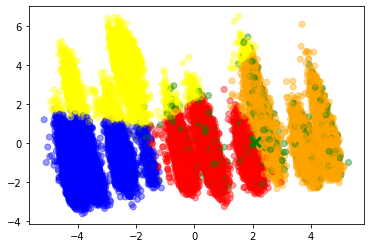

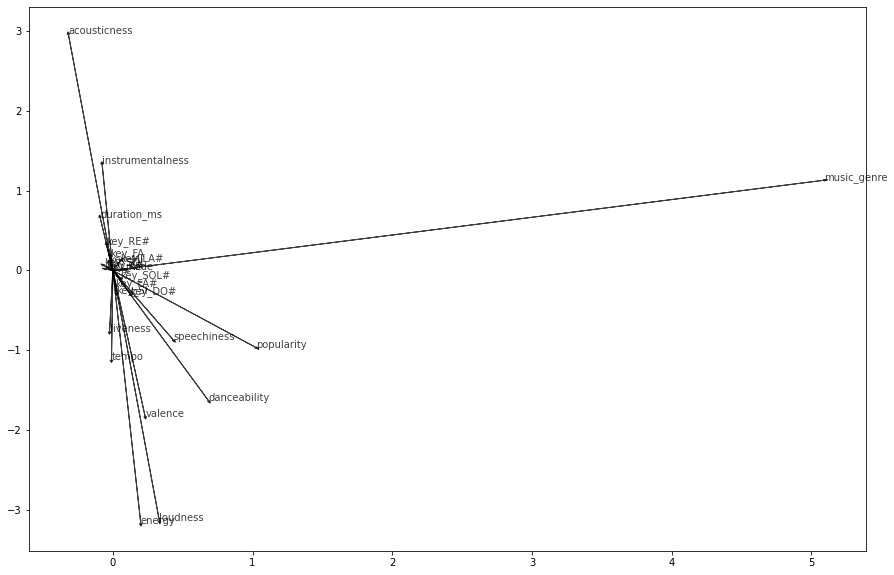

In [140]:
palet= ['green', 'blue', 'red', 'yellow', 'orange']
clusters_colors = [palet[etiquetas[i]] for i in range(len(pca))]
plt.scatter(pca[:, 0], pca[:, 1], c = clusters_colors, marker = 'o',alpha = 0.4)

plt.scatter(centroides_pca[:, 0], centroides_pca[:, 1], marker = 'x', s = 100, linewidths = 3, c = palet)
#Se guardan los datos en una variable para que sea fácil escribir el código
xvector = modelo_pca.components_[0] * max(pca[:,0])
yvector = modelo_pca.components_[1] * max(pca[:,1])

#Se grafican los nombres de los clústeres con la distancia del vector

plt.figure(figsize=(15, 10))
for i in range(len(columnas)):
    
    plt.arrow(0, 0, xvector[i], yvector[i], color = 'black', 
              width = 0.0005, head_width = 0.02, alpha = 0.75)
  
    plt.text(xvector[i], yvector[i], list(columnas)[i], color='black', 
             alpha=0.75)

plt.show()